# 1. Предобработка


Выберите набор данных из списка в конце задания. Обработайте данные в нём:

1. Обработайте недостающие данные в датасете - удалить/заменить/etc, обоснуйте своё решение
1. Постройте как минимум по 1 графику каждого типа из представленных на лекции. Для каждого построенного графика объясните почему отображённые данные лучше всего представимы именно этим типом графика
1. Сохраните датасет


1. Создайте новую колонку, отображающую характеристику набора данных. Новая колонка должна обладать смысловой нагрузкой. 

    Например, для набора данных о прямоугольниках с двумя колонками width и height будет корректно придумать колонку square, равную width*height или perimeter Некорректно будет придумать колонку width2, равную width*2, потому что эта информация не будет нести полезную информацию о фигурах

Не оценивается баллами, но даёт очки уважения:
1. Выдвиньте 2 гипотезы о данных. Например, для датасета codeforces достаточно интересной гипотезой может быть "простые задачи (рейтинг меньше 1500) почти всегда решаются больше 5000 раз"


Наборы данных:

1. [Spotify Tracks DB](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db) - характеристики треков в spotify
1. [VKontakte Dataset of Users' Textual Data](https://www.kaggle.com/oldaandozerskaya/vkontakte-dataset-of-users-textual-data) 1. основная информация 10к профилей ВК
1. [Data Science for COVID-19](https://www.kaggle.com/kimjihoo/coronavirusdataset) - информация о распространении коронавируса в Южной Корее в 2020 году
1. [Dota 2 - Pro Players Matches Results 2019 ~ 2021](https://www.kaggle.com/devinanzelmo/dota-2-matches?select=player_ratings.csv) - информация матчей игроков DoTA 2. Если данные не влезают в память, можно воспользоваться [аналогом pandas](https://dask.org/) для обработки вне RAM
1. [GPS Data of Seabirds](https://www.kaggle.com/saurabhshahane/predicting-animal-behavior-using-gps) - данные о миграции птиц
1. [FAANG Historical Stock Price Data](https://www.kaggle.com/specter7/amazon-amzn-historical-stock-price-data) -  данные о биржевых котировках компаний FAANG c 2016 по 2021 год
1. [NBA 2k20 player dataset](https://www.kaggle.com/isaienkov/nba2k20-player-dataset) - информация об игроках NBA
 [Anime dataset](https://www.kaggle.com/thunderz/anime-dataset?select=user_data.csv) - данные о просмотре аниме пользователями с сайта myAnimeList

<AxesSubplot:>

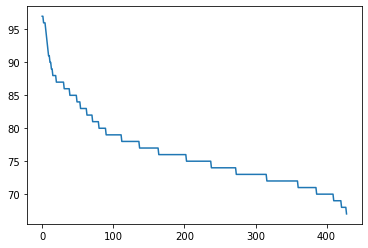

In [1]:
import pandas as pd

df = pd.read_csv('nba2k20-full.csv')

def eraseDollar(value: object ) -> int:
    return int(value.replace("$", ""))

df1 = df


#df.fillna(0)

# colledge team has nan

df1.salary = df.salary.apply(eraseDollar)
df2 = df1.dropna(axis = 1)
df2.to_csv('myNba2k20-full.csv')

df2.rating.plot()


In [2]:
df2.head()

,full_name,rating,jersey,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak
0,LeBron James,97,#23,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,37436858,USA,2003,1,1
1,Kawhi Leonard,97,#2,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,32742000,USA,2011,1,15
2,Giannis Antetokounmpo,96,#34,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,25842697,Greece,2013,1,15
3,Kevin Durant,96,#7,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,37199000,USA,2007,1,2
4,James Harden,96,#13,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,38199000,USA,2009,1,3


<AxesSubplot:>

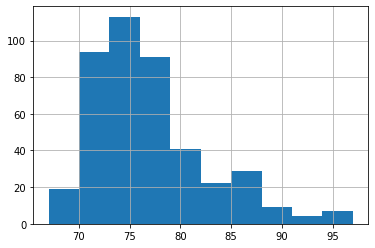

In [3]:
df2.rating.hist()

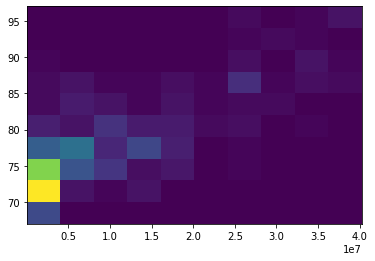

In [4]:
import matplotlib.pyplot as plt

y = [1, 2, 3, 4, 5]

plt.hist2d(df2.salary, 
           df2.rating,

          )



plt.show()


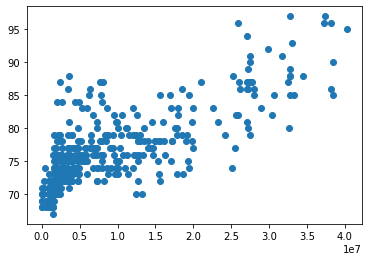

In [5]:
plt.scatter(df2.salary, 
            df2.rating,
#             s=3,  # Меняет размер точки
           )

{'whiskers': [<matplotlib.lines.Line2D at 0x1f0199d6b80>,
 'caps': [<matplotlib.lines.Line2D at 0x1f0199e82e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f0199d67f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f0199e8a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f0199e8d90>],
 'means': []}

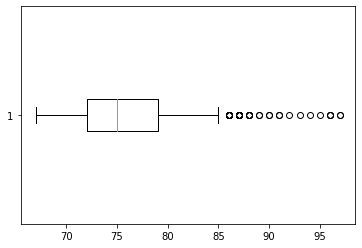

In [6]:
plt.boxplot(df2.rating,
            vert=False, # Ориентация графика
            whis=0.95,  # Насколько редкие записи будут находиться вне "усов" boxplot'а
                        # 0.95 означает, что не будут охвачены записи, которые встречаются
                        # реже, чем 5% данных. Более строгое определение квантиля будет 
                        # будет дано в следующих лекциях)
           )

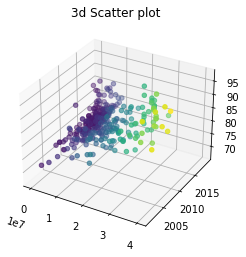

In [7]:
from math import sin, cos
from mpl_toolkits import mplot3d


ax = plt.axes(projection='3d')

z = df2.rating
x = df2.salary
y = df2.draft_year


# Хитрая формула цвета зависит от координат точки
color = [xi + yi for xi, yi in zip(x, y)]

ax.scatter(x, y, z, c=color)
ax.set_title('3d Scatter plot')
plt.show()

In [8]:
df2.assign(unit_salary_rating=lambda x: x.salary/x.rating)


,full_name,rating,jersey,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,unit_salary_rating
0,LeBron James,97,#23,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,37436858,USA,2003,1,1,385946.989691
1,Kawhi Leonard,97,#2,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,32742000,USA,2011,1,15,337546.391753
2,Giannis Antetokounmpo,96,#34,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,25842697,Greece,2013,1,15,269194.760417
3,Kevin Durant,96,#7,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,37199000,USA,2007,1,2,387489.583333
4,James Harden,96,#13,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,38199000,USA,2009,1,3,397906.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,Brandon Goodwin,68,#0,G,10/02/95,6-0 / 1.83,180 lbs. / 81.6 kg.,522738,USA,2018,Undrafted,Undrafted,7687.323529
425,Michael Frazier,68,#21,G,03/08/94,6-3 / 1.91,200 lbs. / 90.7 kg.,79568,USA,2015,2,60,1170.117647
426,Kostas Antetokounmpo,68,#37,F,11/20/97,6-10 / 2.08,200 lbs. / 90.7 kg.,79568,Greece,2018,Undrafted,Undrafted,1170.117647
427,Jalen Lecque,68,#0,G,06/13/00,6-3 / 1.91,190 lbs. / 86.2 kg.,898310,USA,2019,Undrafted,Undrafted,13210.441176


# 2. Интерполяция кривой

Сгенерируйте от 5 до 20 случайных точек, расположите их на оси абсцисс

1. С помощью библиотеки scipy примените один из её [алгоритмов интерполяции](https://docs.scipy.org/doc/scipy/reference/interpolate.html) к сгенерированным данным
1. Изучите математический подход метод выбранного алгоритма интерполяции в scipy. Найдите и продемонстрируйте при сдаче реализацию метода в исходном коде библиотеки scipy. Найти можно в [github репозитории проекта](https://github.com/scipy/scipy)
1. Выберите среди методов интерполяции в scipy любой другой метод интерполяции (кроме линейной интерполяций). Реализуйте выбранный метод без использования сторонних библиотек. Разрешается использовать numpy для упрощения математичеких вычислений
1. Визуализируйте кривую интерполяции библиотечного и вашего алгоритмов с помощью  matplotlib. Сравните качество интерполяции своего и библиотечного методов, объясните разницу в качестве

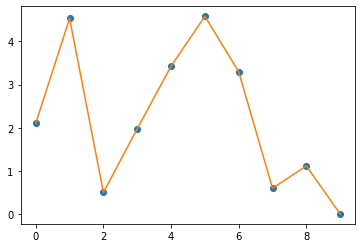

In [9]:
import random
from scipy import interpolate
import numpy as np

k = 10
Y = [random.random() * 5 for _ in range(k)]
X = [x for x in range(10)]


f = interpolate.interp1d(X, Y)
xx = np.arange(0, 10)
#plt.plot(x, y)
plt.plot(X, Y, 'o', xx, f(xx))

In [10]:
import numpy as np
import matplotlib.pyplot as plt


class Lagrange:

    def __init__(self, X, Y):
        self.n = len(X)
        self.X = np.array(X)
        self.Y = np.array(Y)

    def basis(self, x, j):
        l = [(x - self.X[i]) / (self.X[j] - self.X[i])
             for i in range(self.n) if i != j]
        return np.prod(l, axis=0) * self.Y[j]

    def interpolate(self, x):
        b = [self.basis(x, j) for j in range(self.n)]
        return np.sum(b, axis=0)


    
#X  = [-9, -4, -1, 7]
#Y  = [5, 2, -2, 9]

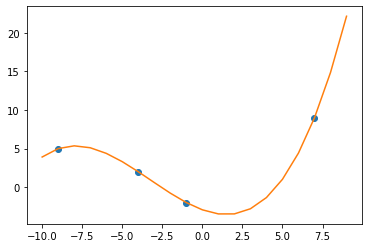

In [11]:
X  = [-9, -4, -1, 7]
Y  = [5, 2, -2, 9]
f = Lagrange(X, Y)

xx = np.arange(-10, 10)
plt.plot(X, Y, 'o', xx, f.interpolate(xx))
plt.show()

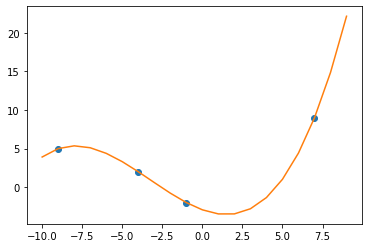

In [12]:
from scipy.interpolate import lagrange
f = lagrange(X, Y)
plt.plot(X, Y, 'o', xx, f(xx))
plt.show()

# 3. Быстрая гистограмма

Иногда хочется получить дискретное распределение из N колонок. Но пока что для этого у нас есть только plt.hist(), которая тратит много времени на отрисовку графика. Вам предлагается реализовать свою функцию построения дискретного распределения

1. Алгоритм должен получать на вход список чисел и количество колонок гистограммы. Возвращать нужно значения столбцов (ось абсцисс гистограммы) и количество значений, принадлежащее столбцу (ось ординат гистограммы). Пример с использованием plt показан ниже, сигнатура функции также показана ниже
1. Изучите функцию [plt.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html). Это такая же гистограмма как plt.hist, но в отличие от hist требуется явно указывать высоту колонок и их название
1. С помощью результатов своего алгоритма и plt.bar постройте гистограмму по массиву из 50+ случайных чисел. Графики plt.bar по вашему алгоритму и plt.hist() должны совпадать, что подтвердит корректность работы вашего алгоритма
1. Сравните скорость построения распределения по массиву чисел с помощью своего алгоритма и с помощью plt.hist. В jupyter рекомендуется использовать built-in magic commands, а именно timeit. Но можно обойтись и ручными измерениями времени выполнения

Значения колонок: [3. 2. 2. 2.]
Названия колонок: [1.   1.75 2.5  3.25 4.  ]
[1, 1, 2, 3, 4, 1, 2, 3, 4]


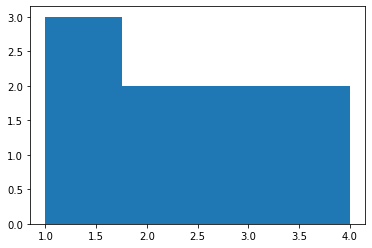

In [13]:
# Пример гистограммы с помощью plt.hist()
import matplotlib.pyplot as plt

array = [1,1,2,3,4,1,2,3,4]

value_counts, bins_names, visual_figure = plt.hist(array, 
                                                   bins=len(set(array))
                                                   )
# Параметр rwidth и визуализацию в своей функции реализовывать не требуется
print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)
print(array)

In [14]:
from typing import List, Tuple, Union

def fast_hist(array: List[Union[int, float]], 
              bins: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param array: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists: 
             first contains value counts of each bin,
             second contains list of bins' labels
    """
    maxx = max(array)
    minn = min(array)
    d = (maxx - minn) / bins
    arrBins = []
    #arrBins = np.arange(minn, maxx + 1e-6, d).tolist()
    #round(2.75, 1)
    p = minn
    for i in range(bins + 1):
        arrBins.append(round(p,8))
        p = p + d
    
    
    def lessOrEq(val:float, temp:float) -> bool:
        return val - temp <= 1e-6
    
    
    def less(val:float, temp:float) -> bool:
        return val - temp < 1e-6
    
    def sat(left:float, right:float, point:float) -> bool:
        return lessOrEq(left, point) and less(point, right) 

    array.sort()
    k = 0 
    cur = 0
    counts = []
    i = 0
    while i < len(array):
        if sat(arrBins[k], arrBins[k+1], array[i]):
            cur=cur + 1
        else:
            counts.append(cur)
            cur = 0
            i = i - 1
            k=k+1
        i = i + 1

    counts.append(cur) 
    counts.append(0) 
    
        
    return (counts, arrBins)




[0.9083022787004471, 0.2551493261614468, 0.12448737617678196, 0.8835247938886096, 0.1344655386362601, 0.6814491703803326, 0.4151674955934722, 0.0037171957459715133, 0.5119275690014662, 0.6904023292951471, 0.5718474807688912, 0.916136259516231, 0.6592454323519881, 0.8374562943649937, 0.134795561360338, 0.8370305258744735, 0.8343881665035738, 0.31784064925317346, 0.5032407640361788, 0.6297504708603168, 0.9967249333911049, 0.3082343834551228, 0.6268344556248413, 0.3879044288032617, 0.249563297647465, 0.8454478426929788, 0.9495334137029302, 0.8586614666005483, 0.014012137004162484, 0.40287821211688557, 0.3580054597464879, 0.8208824366464444, 0.1177557336841113, 0.4176087827235889, 0.9749683651434874, 0.999250856021689, 0.6228403734992958, 0.3266032444020589, 0.3290305787364557, 0.28428250251228115, 0.6029952521057808, 0.7723934258202444, 0.7399869432728294, 0.3935688390378801, 0.12344140985024066, 0.2502571263417218, 0.5446704133171277, 0.8083695740279964, 0.7590718703343595, 0.13359705746

(array([2., 0., 0., 0., 0., 0., 3., 3., 0., 0., 0., 0., 0., 3., 1., 1., 1.,
        3., 0., 1., 0., 2., 3., 0., 0., 0., 0., 2., 1., 1., 0., 1., 0., 1.,
        3., 0., 2., 2., 0., 1., 2., 1., 1., 0., 1., 2., 3., 1., 1., 1., 1.,
        0., 1., 1., 2.]),
 array([0.0037172 , 0.02181781, 0.03991842, 0.05801903, 0.07611964,
        0.09422026, 0.11232087, 0.13042148, 0.14852209, 0.1666227 ,
        0.18472332, 0.20282393, 0.22092454, 0.23902515, 0.25712576,
        0.27522638, 0.29332699, 0.3114276 , 0.32952821, 0.34762882,
        0.36572944, 0.38383005, 0.40193066, 0.42003127, 0.43813188,
        0.4562325 , 0.47433311, 0.49243372, 0.51053433, 0.52863494,
        0.54673556, 0.56483617, 0.58293678, 0.60103739, 0.619138  ,
        0.63723862, 0.65533923, 0.67343984, 0.69154045, 0.70964106,
        0.72774168, 0.74584229, 0.7639429 , 0.78204351, 0.80014412,
        0.81824474, 0.83634535, 0.85444596, 0.87254657, 0.89064718,
        0.9087478 , 0.92684841, 0.94494902, 0.96304963, 0.98115024

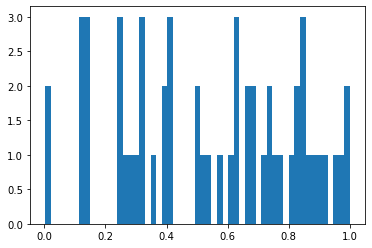

In [15]:
qwe = [random.random() for _ in range(55)]
print(qwe)
plt.hist(qwe,len(set(qwe)))

[0.9083022787004471, 0.2551493261614468, 0.12448737617678196, 0.8835247938886096, 0.1344655386362601, 0.6814491703803326, 0.4151674955934722, 0.0037171957459715133, 0.5119275690014662, 0.6904023292951471, 0.5718474807688912, 0.916136259516231, 0.6592454323519881, 0.8374562943649937, 0.134795561360338, 0.8370305258744735, 0.8343881665035738, 0.31784064925317346, 0.5032407640361788, 0.6297504708603168, 0.9967249333911049, 0.3082343834551228, 0.6268344556248413, 0.3879044288032617, 0.249563297647465, 0.8454478426929788, 0.9495334137029302, 0.8586614666005483, 0.014012137004162484, 0.40287821211688557, 0.3580054597464879, 0.8208824366464444, 0.1177557336841113, 0.4176087827235889, 0.9749683651434874, 0.999250856021689, 0.6228403734992958, 0.3266032444020589, 0.3290305787364557, 0.28428250251228115, 0.6029952521057808, 0.7723934258202444, 0.7399869432728294, 0.3935688390378801, 0.12344140985024066, 0.2502571263417218, 0.5446704133171277, 0.8083695740279964, 0.7590718703343595, 0.13359705746

(array([2., 0., 0., 0., 0., 0., 3., 3., 0., 0., 0., 0., 0., 3., 1., 1., 1.,
        3., 0., 1., 0., 2., 3., 0., 0., 0., 0., 2., 1., 1., 0., 1., 0., 1.,
        3., 0., 2., 2., 0., 1., 2., 1., 1., 0., 1., 2., 3., 1., 1., 1., 1.,
        0., 1., 1., 2.]),
 array([0.0037172 , 0.02181781, 0.03991842, 0.05801903, 0.07611964,
        0.09422026, 0.11232087, 0.13042148, 0.14852209, 0.1666227 ,
        0.18472332, 0.20282393, 0.22092454, 0.23902515, 0.25712576,
        0.27522638, 0.29332699, 0.3114276 , 0.32952821, 0.34762882,
        0.36572944, 0.38383005, 0.40193066, 0.42003127, 0.43813188,
        0.4562325 , 0.47433311, 0.49243372, 0.51053433, 0.52863494,
        0.54673556, 0.56483617, 0.58293678, 0.60103739, 0.619138  ,
        0.63723862, 0.65533923, 0.67343984, 0.69154045, 0.70964106,
        0.72774168, 0.74584229, 0.7639429 , 0.78204351, 0.80014412,
        0.81824474, 0.83634535, 0.85444596, 0.87254657, 0.89064718,
        0.9087478 , 0.92684841, 0.94494902, 0.96304963, 0.98115024

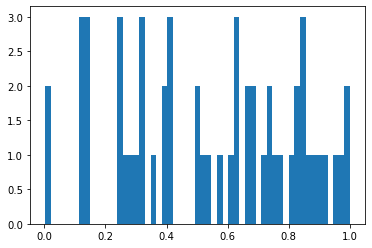

In [16]:
print(qwe)
plt.hist(qwe,len(set(qwe)))

55
56
[2, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 1, 1, 1, 3, 0, 1, 0, 2, 3, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 3, 0, 2, 2, 0, 1, 2, 1, 1, 0, 1, 2, 3, 1, 1, 1, 1, 0, 1, 1, 2, 0]
56
[0.0037172, 0.02181781, 0.03991842, 0.05801903, 0.07611964, 0.09422026, 0.11232087, 0.13042148, 0.14852209, 0.1666227, 0.18472332, 0.20282393, 0.22092454, 0.23902515, 0.25712576, 0.27522638, 0.29332699, 0.3114276, 0.32952821, 0.34762882, 0.36572944, 0.38383005, 0.40193066, 0.42003127, 0.43813188, 0.4562325, 0.47433311, 0.49243372, 0.51053433, 0.52863494, 0.54673556, 0.56483617, 0.58293678, 0.60103739, 0.619138, 0.63723862, 0.65533923, 0.67343984, 0.69154045, 0.70964106, 0.72774168, 0.74584229, 0.7639429, 0.78204351, 0.80014412, 0.81824474, 0.83634535, 0.85444596, 0.87254657, 0.89064718, 0.9087478, 0.92684841, 0.94494902, 0.96304963, 0.98115024, 0.99925086]


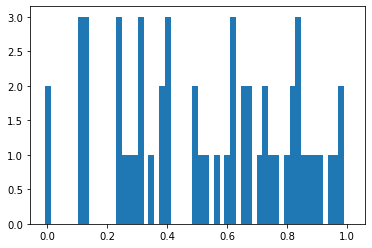

In [17]:
tup = fast_hist(qwe, len(set(qwe)))
plt.bar(tup[1], tup[0],width=0.02)
print(len(set(qwe)))
print(len(tup[0]))
print(tup[0])
print(len(tup[1]))
print(tup[1])


In [18]:
!pip install ipython-autotime
%load_ext autotime

time: 0 ns (started: 2021-10-31 02:13:03 +03:00)


(array([2., 0., 0., 0., 0., 0., 3., 3., 0., 0., 0., 0., 0., 3., 1., 1., 1.,
        3., 0., 1., 0., 2., 3., 0., 0., 0., 0., 2., 1., 1., 0., 1., 0., 1.,
        3., 0., 2., 2., 0., 1., 2., 1., 1., 0., 1., 2., 3., 1., 1., 1., 1.,
        0., 1., 1., 2.]),
 array([0.0037172 , 0.02181781, 0.03991842, 0.05801903, 0.07611964,
        0.09422026, 0.11232087, 0.13042148, 0.14852209, 0.1666227 ,
        0.18472332, 0.20282393, 0.22092454, 0.23902515, 0.25712576,
        0.27522638, 0.29332699, 0.3114276 , 0.32952821, 0.34762882,
        0.36572944, 0.38383005, 0.40193066, 0.42003127, 0.43813188,
        0.4562325 , 0.47433311, 0.49243372, 0.51053433, 0.52863494,
        0.54673556, 0.56483617, 0.58293678, 0.60103739, 0.619138  ,
        0.63723862, 0.65533923, 0.67343984, 0.69154045, 0.70964106,
        0.72774168, 0.74584229, 0.7639429 , 0.78204351, 0.80014412,
        0.81824474, 0.83634535, 0.85444596, 0.87254657, 0.89064718,
        0.9087478 , 0.92684841, 0.94494902, 0.96304963, 0.98115024

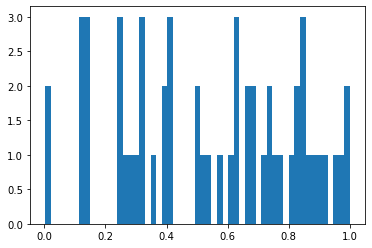

time: 875 ms (started: 2021-10-31 02:13:04 +03:00)


In [19]:
plt.hist(qwe,len(set(qwe)))

<BarContainer object of 56 artists>

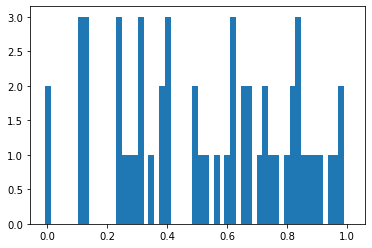

time: 750 ms (started: 2021-10-31 02:13:04 +03:00)


In [20]:
tup = fast_hist(qwe, len(set(qwe)))
plt.bar(tup[1], tup[0],width=0.02)